**Pima Indians Diabetes Database**

Predict the onset of diabetes based on diagnostic measures:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Attribute Information:

-Number of times pregnant

-Plasma glucose concentration a 2 hours in an oral glucose tolerance test

-Diastolic blood pressure (mm Hg)

-Triceps skin fold thickness (mm)

-2-Hour serum insulin (mu U/ml)

-Body mass index (weight in kg/(height in m)^2)

-Diabetes pedigree function

-Age (years)

-Class variable (0 or 1)

Objective:

Get familiar with the problem statement, know the dataset thoroghly and Analyse the given dataset by exploring the hidden insights with algorithms

Problem Definition:

Understand the dataset and features.

Perform Data Preprocessing technique to get balanced structured data.

Perform Data Analysis and Derive Valuable Inferences

Perform Exploratory Data Analysis and Derive Valuable Inferences

Perform Algorthims

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

Upload the Dataset Files onto the Google Colab.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Read the Dataset.

In [4]:
df = pd.read_csv('diabetes.csv',sep=",", encoding='cp1252')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Gain the Dataset Knowledge - Know Each Features Thorougly.

In [5]:
df.head(10)#Displays the first 10 rows by default.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.columns #Displays the column names.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.info()# Prints Info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()#Displays the 5 parameter statistical summary [Count, Mean, Standard Deviation, Minimum value, Quartiles, Maximum value] for columns with numerical data & NOT FOR CATEGORICAL COLUMNS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.shape# Shape function Dimensions OF Datasets

(768, 9)

In [11]:
df.isnull().sum()#Check Number of missing values in the dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#Checking for duplicate values
df.duplicated().sum()

0

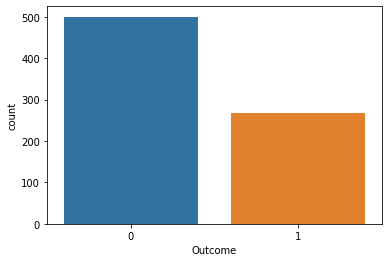

In [13]:
#Plot the Outcome occurence time
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
sns.countplot(df['Outcome'])
plt.show()

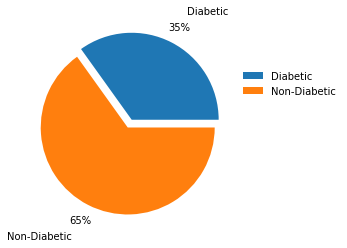

In [14]:
#Plot shows the total how many patients are Diabetic or not.
fig, ax = plt.subplots()
labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0,pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [15]:
#Checking Missing Values and replace it
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Univariate Analysis

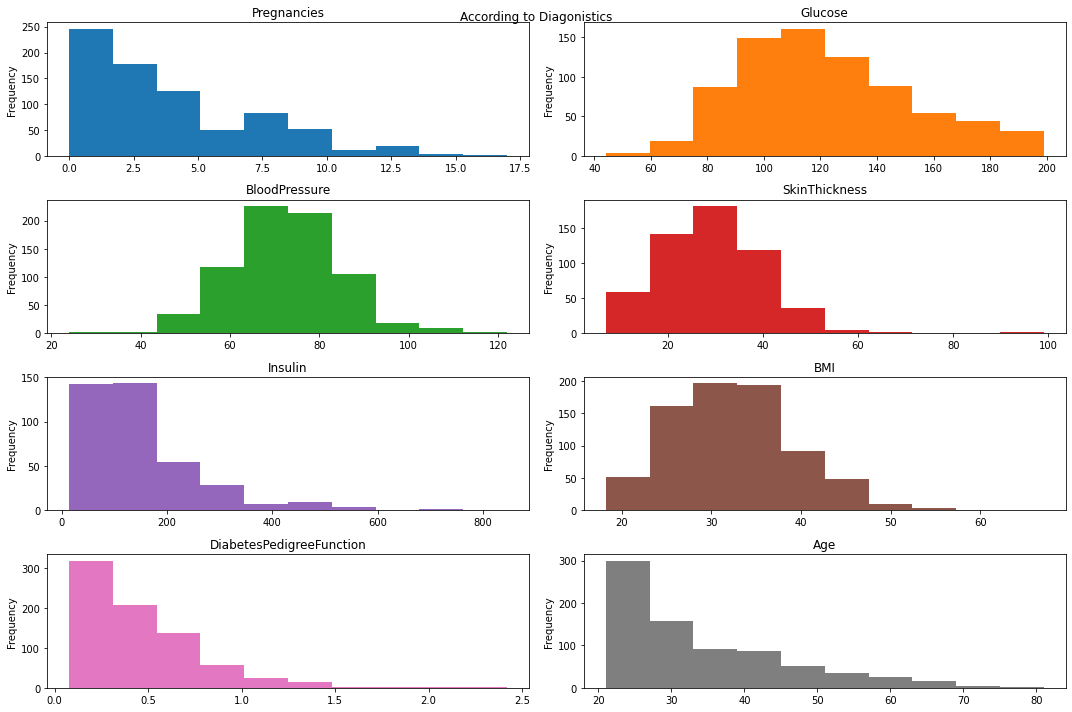

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('According to Diagonistics')
plt.tight_layout()
plt.show()

In [17]:
#Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. 
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


In [18]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person is diabetic or not
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])

Bivariate Analysis

In [21]:
def distplot(col_name):
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="green",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

,Pregnancies
Outcome,
0,3.298000
1,4.865672


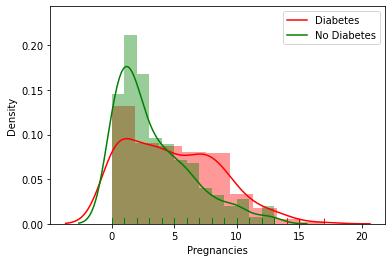

In [22]:
distplot('Pregnancies')
mean_target('Pregnancies')

,Insulin
Outcome,
0,127.792000
1,164.701493


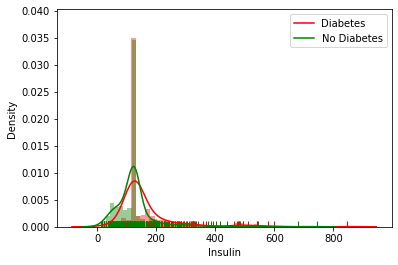

In [23]:
distplot('Insulin')
mean_target('Insulin')

,BloodPressure
Outcome,
0,70.935397
1,75.147324


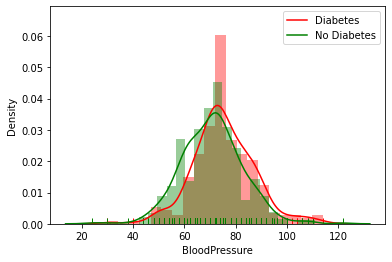

In [24]:
distplot('BloodPressure')
mean_target('BloodPressure')

,Glucose
Outcome,
0,110.710121
1,142.165573


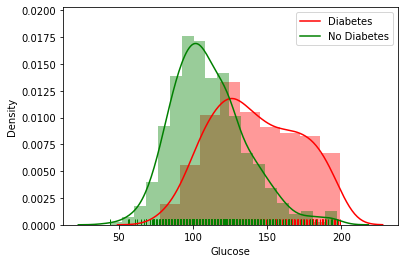

In [25]:
distplot('Glucose')
mean_target('Glucose')

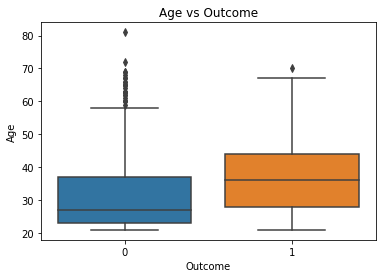

In [26]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

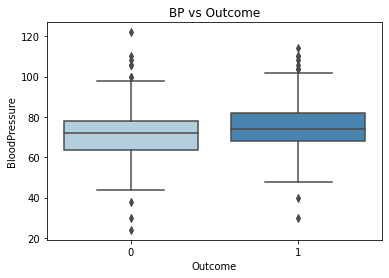

In [27]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

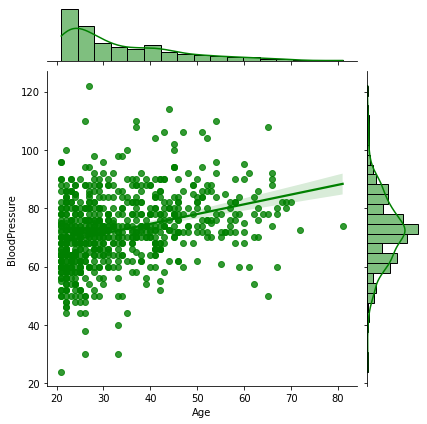

In [28]:
sns.jointplot(x='Age',y='BloodPressure', data=df, kind = 'reg', color = 'green')

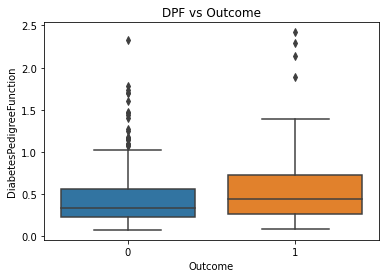

In [30]:
dff = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)
plt.title('DPF vs Outcome')
plt.show()

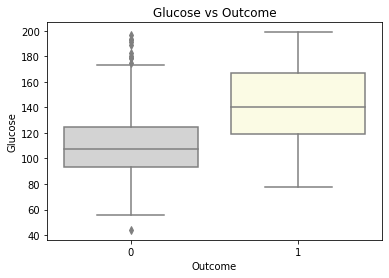

In [31]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

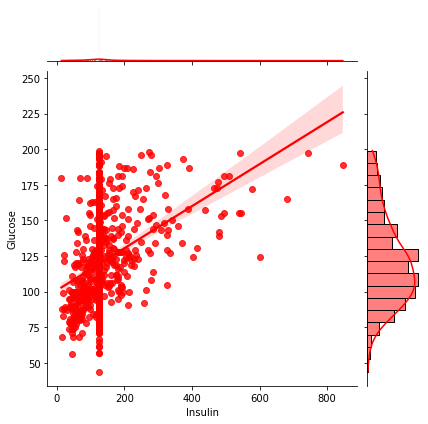

In [32]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

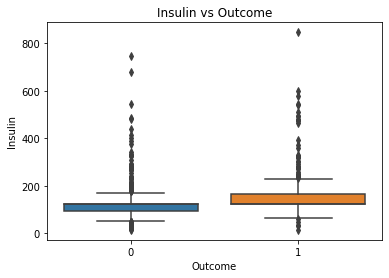

In [33]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.title('Insulin vs Outcome')
plt.show()

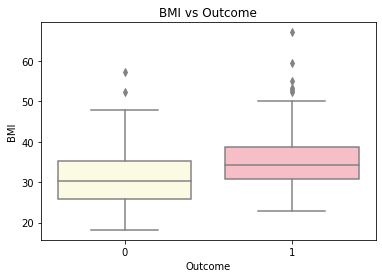

In [34]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

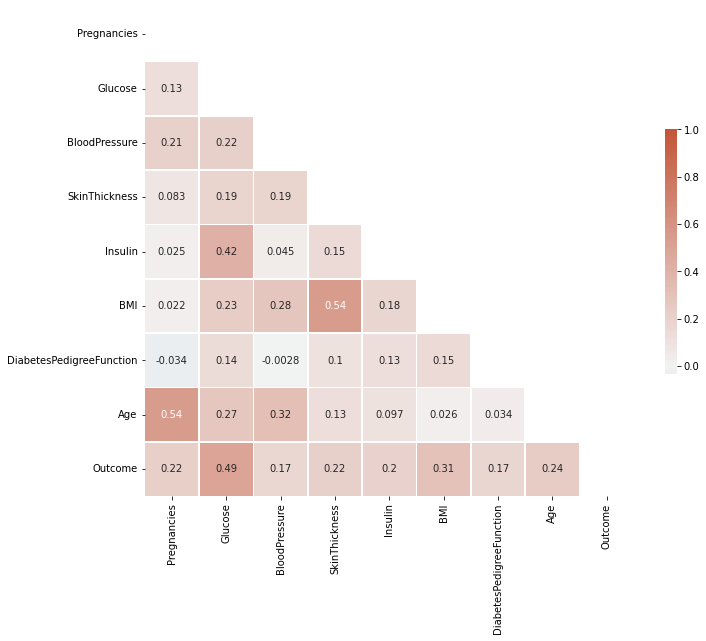

In [35]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

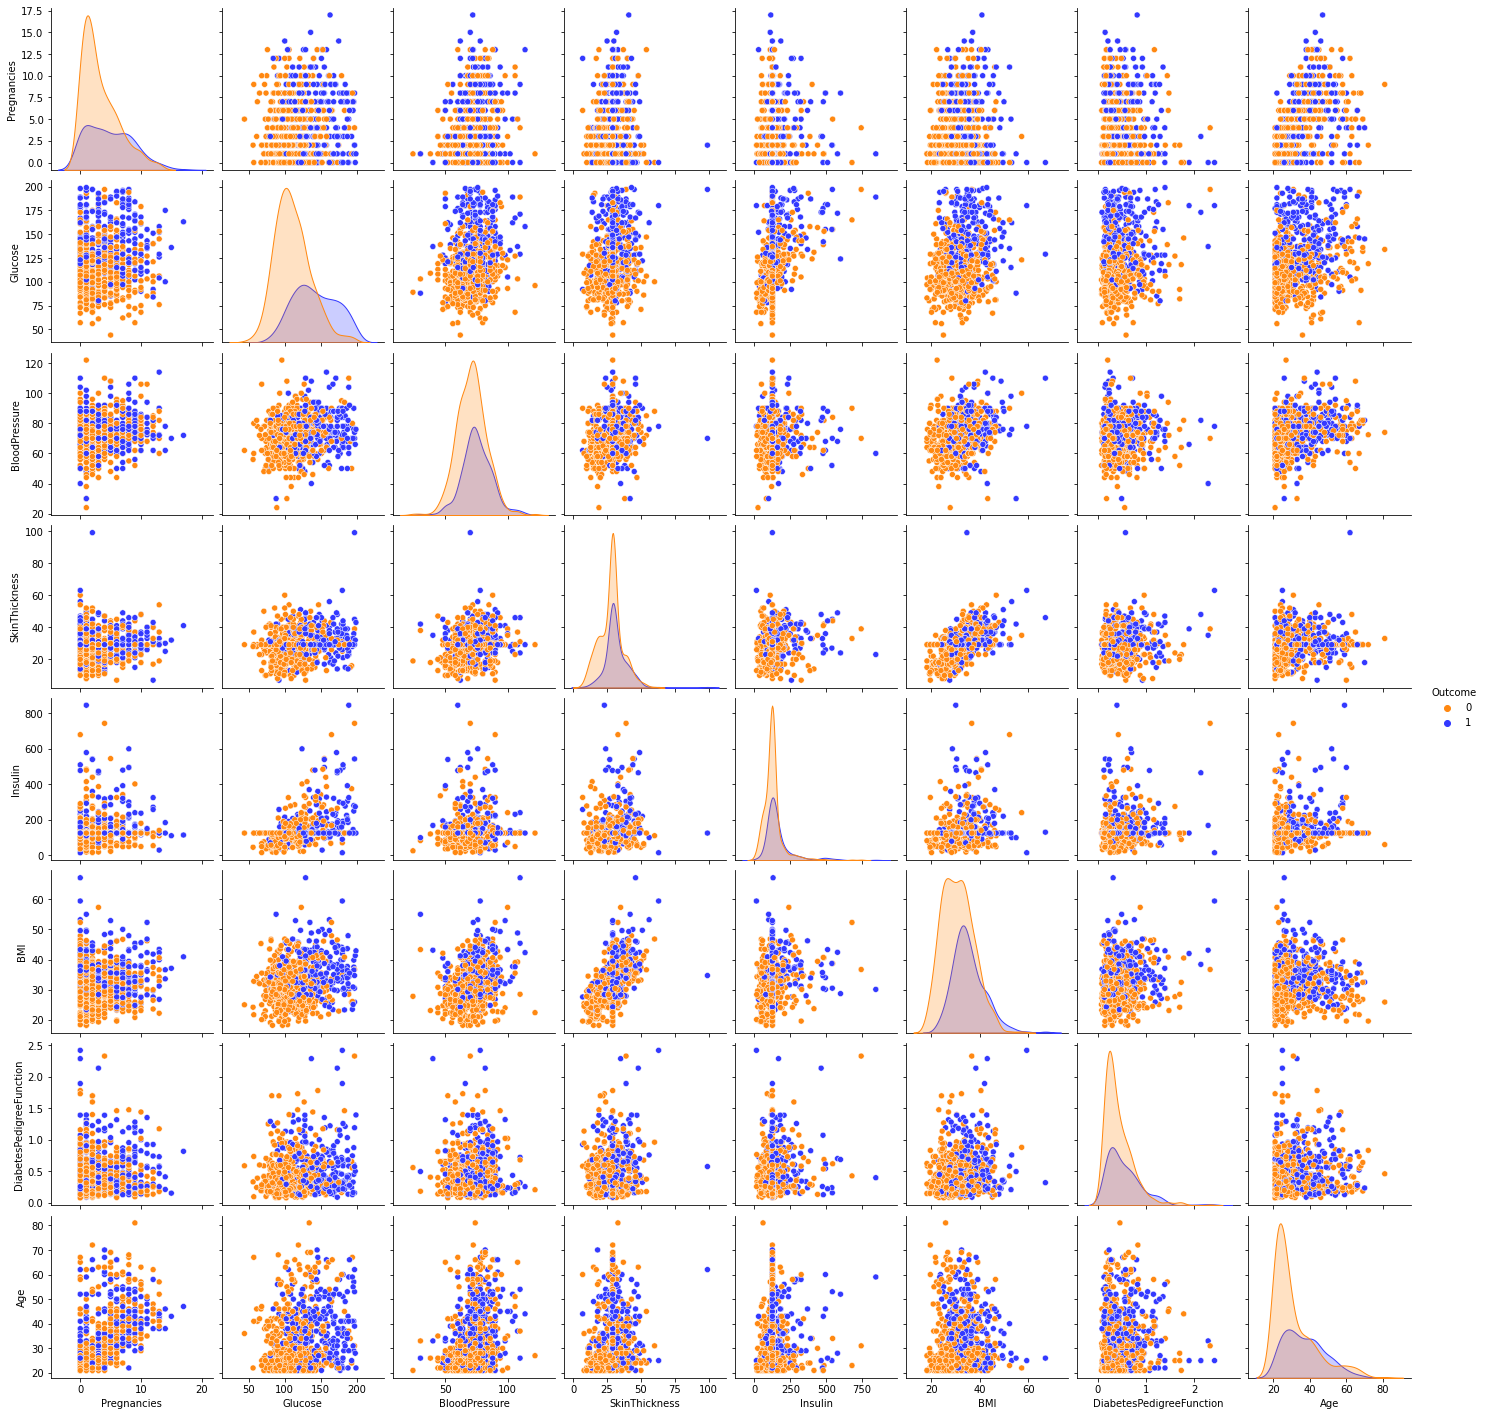

In [36]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

In [37]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [38]:
# importing the scaler
from sklearn.preprocessing import StandardScaler #StandardScaler removes the mean and scales each feature/variable to unit variance.
# creating a copy of dataframe
df1 = df
col_cols = list(df1.columns)
# removing the target variable from the columns list
col_cols.pop() 
# separating the features and target 
X = df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]
# instializing the scaler
scaler = StandardScaler()
X[col_cols] = scaler.fit_transform(X[col_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,0.316566,1.548980,5.484909,-0.020496


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 8)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
749,0.639947,1.325390,-0.860753,8.087936e-16,-0.181541,-1.187287,-0.887541,1.425995
500,-0.547919,-0.154088,1.455504,-1.155739e+00,-0.807071,-1.056296,-0.479825,-1.041549
577,-0.547919,-0.121211,0.628269,8.087936e-16,-0.181541,1.519871,0.667820,-1.041549
505,1.827813,-1.534934,0.793716,8.087936e-16,-0.181541,0.122628,-0.630831,0.404942
63,-0.547919,0.634967,-1.191647,5.516745e-01,-0.146790,-1.027187,0.685941,-0.786286


In [40]:
# Import the Logistic Regression Library
from sklearn.linear_model import LogisticRegression
# Define an Object for Logistic Regression Class
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [41]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
302,0.342981,-1.469180,0.793716,1.348468e+00,-1.143004,0.486493,-0.953984,0.149679
131,1.530847,0.010298,-1.357094,8.087936e-16,-0.181541,0.122628,1.939290,-0.020496
124,-1.141852,-0.285597,0.297376,8.087936e-16,-0.181541,0.122628,-0.585529,-0.871374
486,-0.844885,0.569212,-0.860753,1.348468e+00,3.930739,1.199669,0.193661,-1.041549
306,1.827813,1.292513,-0.364412,-7.004289e-01,-0.100454,-1.012632,-0.440564,1.170732


In [42]:
# Predicting which class each of the Row belong to
y_pred = logistic_regressor.predict(X_test)
y_prob = logistic_regressor.predict_proba(X_test)

In [43]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

In [44]:
y_prob[0:5]

array([[0.91355979, 0.08644021],
       [0.26937877, 0.73062123],
       [0.87970153, 0.12029847],
       [0.58574959, 0.41425041],
       [0.31966692, 0.68033308]])

In [45]:
# Accuracy Score of Train
from sklearn.metrics import accuracy_score
y_train_pred = logistic_regressor.predict(X_train)
acc_score = accuracy_score(y_train,y_train_pred)
print(acc_score)

0.7802607076350093


In [46]:
# Accuracy Score of Test
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.7619047619047619


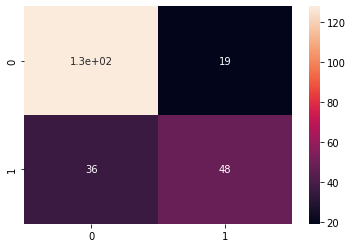

In [47]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
dataframe_conf_matrix = conf_matrix
sns.heatmap(dataframe_conf_matrix, annot=True)

In [48]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.72      0.57      0.64        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
CM = confusion_matrix(y_test, y_pred)
CM #confusion matrix for two classes(Actual and predicted class)

array([[128,  19],
       [ 36,  48]])

Accuracy

Accuracy=TN+TP/TN+TP+FN+FP

In [51]:
Accuracy = (CM[0][0] + CM[1][1]) / (CM[0][0] + CM[1][1] + CM[0][1] + CM[1][0])
Accuracy 

0.7619047619047619

Error Rate

Error Rate=FP+FN/P+N

In [52]:
ErrorRate = (CM[0][1] + CM[1][0]) / (CM[0][0] + CM[1][1] + CM[0][1] + CM[1][0])
ErrorRate

0.23809523809523808

In [53]:
Specificity = CM[1][1]/(CM[1][1] + CM[0][1])
Specificity

0.7164179104477612

  Precision
  
  Precision=TP/(TP+FP)

In [54]:
Precision = CM[0][0]/(CM[0][0] + CM[0][1])
Precision

0.8707482993197279

Recall

Recall=TP/(TP+FN)

In [55]:
Recall = CM[0][0]/(CM[0][0] + CM[1][0])#TP/TP+FN
Recall

0.7804878048780488

F1 Score

F1 Score = (2*(Precision*Recall))/(Precision + Recall)

In [56]:
F1Score = (2*(Precision*Recall))/(Precision + Recall)
F1Score

0.8231511254019294

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
def doLogisticRegression(x, y, test_size = 0.20, random_state = 42, penalty='l2', solver='lbfgs'):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state)
    
    logistic_regressor = LogisticRegression(penalty = penalty, solver = solver)
    logistic_regressor.fit(x_train, y_train)
    y_pred = logistic_regressor.predict(x_test)
    
    acc_score = accuracy_score(y_test, y_pred)
    
    return acc_score

In [59]:
penalties = ['none', 'l2']
test_size = [0.30, 0.25, 0.20]
random_states = [21, 42, 84]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for t_size in test_size:
    for r_state in random_states:
        for penalty in penalties:
            for solver in solvers:
                accuracy = doLogisticRegression(X, y, t_size, r_state, penalty)
                print("Test: {} | Random State: {} | Penalty: {} | Solver: {} | Accuracy : {}".format(t_size, r_state, penalty, solver, accuracy))

Test: 0.3 | Random State: 21 | Penalty: none | Solver: newton-cg | Accuracy : 0.7316017316017316
Test: 0.3 | Random State: 21 | Penalty: none | Solver: lbfgs | Accuracy : 0.7316017316017316
Test: 0.3 | Random State: 21 | Penalty: none | Solver: liblinear | Accuracy : 0.7316017316017316
Test: 0.3 | Random State: 21 | Penalty: none | Solver: sag | Accuracy : 0.7316017316017316
Test: 0.3 | Random State: 21 | Penalty: none | Solver: saga | Accuracy : 0.7316017316017316
Test: 0.3 | Random State: 21 | Penalty: l2 | Solver: newton-cg | Accuracy : 0.7359307359307359
Test: 0.3 | Random State: 21 | Penalty: l2 | Solver: lbfgs | Accuracy : 0.7359307359307359
Test: 0.3 | Random State: 21 | Penalty: l2 | Solver: liblinear | Accuracy : 0.7359307359307359
Test: 0.3 | Random State: 21 | Penalty: l2 | Solver: sag | Accuracy : 0.7359307359307359
Test: 0.3 | Random State: 21 | Penalty: l2 | Solver: saga | Accuracy : 0.7359307359307359
Test: 0.3 | Random State: 42 | Penalty: none | Solver: newton-cg | Acc

In [60]:
db1 = pd.DataFrame(columns = ['Test Size', 'Random States', 'Penalty', 'Solvers', 'Accuracy'])
db1

,Test Size,Random States,Penalty,Solvers,Accuracy


In [61]:
penalties = ['none', 'l2']
test_size = [0.30, 0.25, 0.20]
random_states = [21, 42, 84]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for t_size in test_size:
    for r_state in random_states:
        for penalty in penalties:
            for solver in solvers:
                accuracy = doLogisticRegression(X, y, t_size, r_state, penalty)
                
                diabetes = {}
                diabetes['Test Size'] = t_size
                diabetes['Random States'] = r_state
                diabetes['Penalty'] = penalty
                diabetes['Solvers'] = solver
                diabetes['Accuracy'] = accuracy

                db1 = db1.append(diabetes, ignore_index = True)

In [62]:
db1.head(10)

,Test Size,Random States,Penalty,Solvers,Accuracy
0,0.3,21,none,newton-cg,0.731602
1,0.3,21,none,lbfgs,0.731602
2,0.3,21,none,liblinear,0.731602
3,0.3,21,none,sag,0.731602
4,0.3,21,none,saga,0.731602
5,0.3,21,l2,newton-cg,0.735931
6,0.3,21,l2,lbfgs,0.735931
7,0.3,21,l2,liblinear,0.735931
8,0.3,21,l2,sag,0.735931
9,0.3,21,l2,saga,0.735931


In [63]:
db1.tail()

,Test Size,Random States,Penalty,Solvers,Accuracy
85,0.2,84,l2,newton-cg,0.779221
86,0.2,84,l2,lbfgs,0.779221
87,0.2,84,l2,liblinear,0.779221
88,0.2,84,l2,sag,0.779221
89,0.2,84,l2,saga,0.779221


In [64]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [65]:
# Logistic regression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_prob_lr = LR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

Plot ROC Curve - Receiver Operator Characteristic 

Shows & explains how much model captured data variabilty


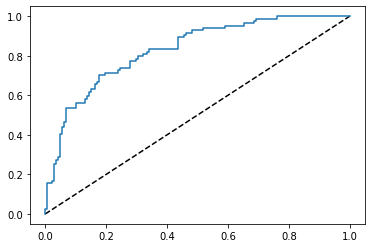

In [66]:
 #Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)

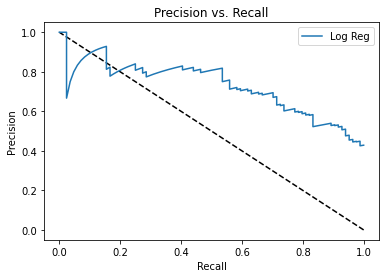

In [67]:
#Plot Precision and Recall
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

Random Forest Classifier

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test);y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred)*100)

[[97 26]
 [25 44]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192

73.4375


In [71]:
# Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_features='sqrt',min_samples_leaf=5,random_state=0).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[98 25]
 [24 45]]
0.7447916666666666
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.64      0.65      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.74      0.75       192



In [72]:
#Randomized search cv
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [73]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,verbose=2,random_state=100,n_jobs=-1)
## fit the random forest model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random

In [74]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [75]:
best_random_grid=rf_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[97 26]
 [22 47]]
Accuracy Score 0.75
Classification report:               precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.64      0.68      0.66        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



Conclusions

I have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable. Based on the observations listed, I compared the different algorithm and check which give more precisely result according to problem statement.